In [89]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from os import path, makedirs
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
import itertools
from sklearn.utils.fixes import signature
from sklearn.impute import SimpleImputer

In [91]:
DATA_PATH = path.abspath("data/")
TEST_DATA_PATH = path.join(DATA_PATH, 'test')
TRAIN_DATA_PATH = path.join(DATA_PATH, 'train')
VALIDATION_DATA_PATH = path.join(DATA_PATH, 'validation')
DATA_FILE = path.join(DATA_PATH, 'data.csv')


In [92]:
df = pd.read_csv(path.join(DATA_PATH, 'data.csv'))


AxesSubplot(0.125,0.125;0.62x0.755)


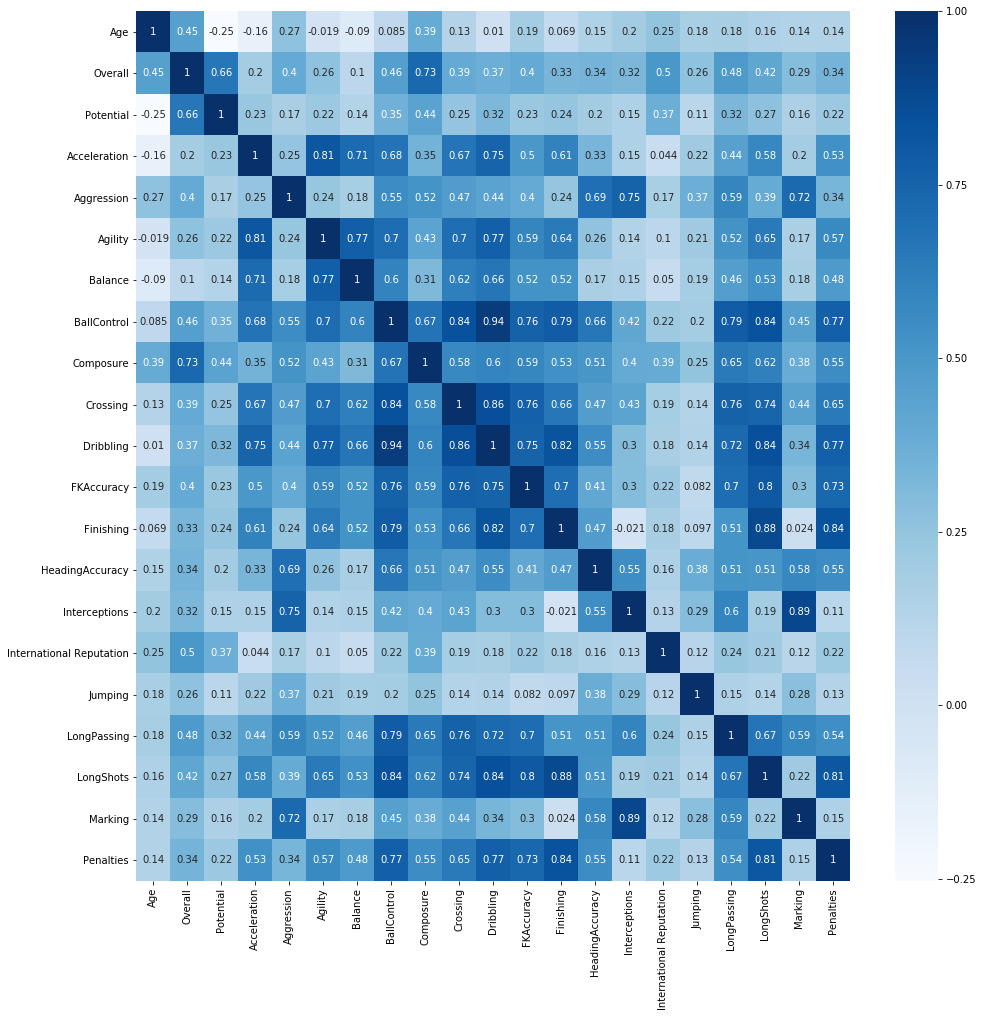

In [93]:
plt.rcParams['figure.figsize']=(16,16)
r=sns.heatmap(df[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position']].corr(), annot = True, cmap='Blues')
# hm.set_title(label='Heatmap of dataset', fontsizeprint()
print(r)

In [94]:
# Show the info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [95]:
    # I check where there are NaN values
    df.isnull().any()
    df = df.fillna(' ')

In [96]:
df = df.drop(['Loaned From'], axis=1)
df = df.drop(['Interceptions'], axis=1)
df = df.drop(['Marking'], axis=1)



In [97]:
# Show some statistics about dataset
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000


In [98]:
# Number of unique elements in dataset
df.nunique()

Unnamed: 0                  18207
ID                          18207
Name                        17194
Age                            29
Photo                       18207
Nationality                   164
Flag                          164
Overall                        48
Potential                      47
Club                          652
Club Logo                     679
Value                         217
Wage                          144
Special                      1422
Preferred Foot                  3
International Reputation        6
Weak Foot                       6
Skill Moves                     6
Work Rate                      10
Body Type                      11
Real Face                       3
Position                       28
Jersey Number                 100
Joined                       1737
Contract Valid Until           37
Height                         22
Weight                         58
LS                             94
ST                             94
RS            

In [99]:
df = df.drop(['Club Logo', 'Real Face', 'Photo'], axis=1)

In [100]:
# What columns are in dataset?
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 

In [101]:
df['Age']
# df.groupby('Age').count()

0        31
1        33
2        26
3        27
4        27
5        27
6        32
7        31
8        32
9        25
10       29
11       28
12       32
13       32
14       27
15       24
16       24
17       27
18       26
19       26
20       29
21       31
22       32
23       30
24       33
25       19
26       26
27       26
28       26
29       27
         ..
18177    18
18178    18
18179    17
18180    22
18181    17
18182    18
18183    44
18184    18
18185    19
18186    20
18187    19
18188    17
18189    18
18190    18
18191    18
18192    18
18193    18
18194    18
18195    18
18196    19
18197    18
18198    18
18199    18
18200    18
18201    18
18202    19
18203    19
18204    16
18205    17
18206    16
Name: Age, Length: 18207, dtype: int64

In [102]:
#Creating bins for Age
bins = pd.IntervalIndex.from_tuples([(16, 20), (21, 25), (26, 30), (31, 35), (36, 45)])
bins
df['Age'] = pd.cut(df['Age'], [15, 20, 25,30,35, 46], labels=['16 - 20', '21 - 25', '26 - 30', '31 - 35', '35+'])

In [103]:
df['Age']

0        31 - 35
1        31 - 35
2        26 - 30
3        26 - 30
4        26 - 30
5        26 - 30
6        31 - 35
7        31 - 35
8        31 - 35
9        21 - 25
10       26 - 30
11       26 - 30
12       31 - 35
13       31 - 35
14       26 - 30
15       21 - 25
16       21 - 25
17       26 - 30
18       26 - 30
19       26 - 30
20       26 - 30
21       31 - 35
22       31 - 35
23       26 - 30
24       31 - 35
25       16 - 20
26       26 - 30
27       26 - 30
28       26 - 30
29       26 - 30
          ...   
18177    16 - 20
18178    16 - 20
18179    16 - 20
18180    21 - 25
18181    16 - 20
18182    16 - 20
18183        35+
18184    16 - 20
18185    16 - 20
18186    16 - 20
18187    16 - 20
18188    16 - 20
18189    16 - 20
18190    16 - 20
18191    16 - 20
18192    16 - 20
18193    16 - 20
18194    16 - 20
18195    16 - 20
18196    16 - 20
18197    16 - 20
18198    16 - 20
18199    16 - 20
18200    16 - 20
18201    16 - 20
18202    16 - 20
18203    16 - 20
18204    16 - 

In [104]:
df['Age'].isna().sum()

0

In [105]:
df.to_csv('modifiedData.csv',index=False)


In [106]:
df['Position'] = df['Position'].apply(lambda x: 1 if x.endswith('B') else 0)

In [107]:
df.Position

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       1
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
18177    0
18178    0
18179    1
18180    0
18181    1
18182    0
18183    0
18184    0
18185    0
18186    0
18187    1
18188    0
18189    0
18190    0
18191    1
18192    0
18193    1
18194    0
18195    0
18196    0
18197    0
18198    0
18199    0
18200    0
18201    1
18202    0
18203    0
18204    0
18205    0
18206    0
Name: Position, Length: 18207, dtype: int64

In [108]:
y = df['Position']
x = df.drop('Position', axis = 1)

print(x.shape)
print(y.shape)

(18207, 82)
(18207,)


In [109]:
x = x.astype(str).apply(preprocessing.LabelEncoder().fit_transform)

In [110]:
x

,Unnamed: 0,ID,Name,Age,Nationality,Flag,Overall,Potential,Club,Value,...,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,566,9632,3,6,122,47,45,213,16,...,68,84,20,17,38,3,7,6,62,294
1,1,6031,3153,3,123,107,47,45,327,195,...,79,83,23,14,49,3,7,6,3,83
2,9319,3131,12508,2,20,124,46,44,436,18,...,75,82,16,25,70,68,7,7,3,295
3,10430,3467,4136,2,139,114,45,44,376,190,...,31,56,13,4,71,65,76,76,76,105
4,11541,3452,8617,2,13,137,45,43,375,12,...,72,76,51,44,7,5,36,2,5,233
5,12652,1985,4419,2,13,137,45,42,135,213,...,80,79,19,13,3,4,47,67,62,188
6,13763,1446,9640,3,35,1,45,42,471,182,...,76,72,71,68,5,68,58,6,73,103
7,14874,1390,9841,3,158,131,45,42,213,201,...,79,73,37,30,17,14,20,20,21,169
8,15985,483,15417,3,139,114,45,42,471,154,...,68,70,89,88,3,59,78,56,3,23
9,17096,4442,7775,1,136,113,44,44,62,183,...,2,58,3,9,67,70,67,76,72,122


In [111]:
x = x.values #returns a numpy array
standart_scaler = StandardScaler()
x_scaled = standart_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)

C:\Users\mamon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mamon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [112]:
x

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,-1.731956,-1.624267,0.216547,1.614479,-1.466279,0.830881,3.873802,3.698320,-0.567920,-1.271495,...,1.707037,3.204881,-0.906461,-0.951504,0.465893,-0.921267,-0.799371,-0.821961,1.333937,-0.384889
1,-1.731765,-0.584485,-1.093866,1.614479,0.979744,0.428852,3.873802,3.698320,0.030422,1.277435,...,2.379476,3.119382,-0.776275,-1.083367,0.908475,-0.921267,-0.799371,-0.821961,-0.935861,-0.909206
2,0.041097,-1.136245,0.798233,0.592335,-1.173592,0.884484,3.729049,3.535345,0.602522,-1.243015,...,2.134952,3.033884,-1.080043,-0.599871,1.753404,1.787620,-0.799371,-0.786376,-0.935861,-0.382404
3,0.252478,-1.072317,-0.895049,0.592335,1.314243,0.616466,3.584295,3.535345,0.287605,1.206236,...,-0.554804,0.810930,-1.210228,-1.522908,1.793638,1.662594,1.610330,1.668940,1.872533,-0.854538
4,0.463859,-1.075171,0.011257,0.592335,-1.319936,1.232909,3.584295,3.372370,0.282356,-1.328454,...,1.951560,2.520895,0.438794,0.235257,-0.781382,-0.837917,0.213402,-0.964298,-0.858919,-0.536469
5,0.675240,-1.354285,-0.837811,0.592335,-1.319936,1.232909,3.584295,3.209396,-0.977312,1.533752,...,2.440607,2.777389,-0.949857,-1.127321,-0.942321,-0.879592,0.597558,1.348681,1.333937,-0.648290
6,0.886621,-1.456837,0.218165,1.614479,-0.860000,-2.412148,3.584295,3.209396,0.786224,1.092317,...,2.196083,2.178902,1.306701,1.290157,-0.861852,1.787620,0.981713,-0.821961,1.757120,-0.859508
7,1.098002,-1.467491,0.258818,1.614479,1.711460,1.072098,3.584295,3.209396,-0.567920,1.362874,...,2.379476,2.264400,-0.168741,-0.380101,-0.379035,-0.462840,-0.345369,-0.323781,-0.243380,-0.695503
8,1.309384,-1.640059,1.386594,1.614479,1.314243,0.616466,3.584295,3.209396,0.786224,0.693602,...,1.707037,2.007905,2.087817,2.169239,-0.942321,1.412543,1.680177,0.957254,-0.935861,-1.058301
9,1.520765,-0.886812,-0.159042,-0.429809,1.251524,0.589664,3.439542,3.535345,-1.360461,1.106557,...,-2.327598,0.981927,-1.644182,-1.303137,1.632700,1.870970,1.296022,1.668940,1.718649,-0.812294


In [113]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42, shuffle = False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14565, 82)
(14565,)
(3642, 82)
(3642,)


In [114]:
logreg = LogisticRegression(random_state = 50, verbose=1)
logreg


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=50, solver='warn',
          tol=0.0001, verbose=1, warm_start=False)

In [115]:
logreg.fit(X_train, y_train)

C:\Users\mamon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=50, solver='warn',
          tol=0.0001, verbose=1, warm_start=False)

In [116]:
y_test

14565    0
14566    0
14567    1
14568    1
14569    1
14570    0
14571    0
14572    1
14573    0
14574    1
14575    1
14576    1
14577    1
14578    0
14579    0
14580    0
14581    0
14582    1
14583    0
14584    0
14585    0
14586    0
14587    1
14588    0
14589    1
14590    0
14591    0
14592    0
14593    0
14594    0
        ..
18177    0
18178    0
18179    1
18180    0
18181    1
18182    0
18183    0
18184    0
18185    0
18186    0
18187    1
18188    0
18189    0
18190    0
18191    1
18192    0
18193    1
18194    0
18195    0
18196    0
18197    0
18198    0
18199    0
18200    0
18201    1
18202    0
18203    0
18204    0
18205    0
18206    0
Name: Position, Length: 3642, dtype: int64

In [117]:
pred_class = logreg.predict(X_test)
pred_class[0:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_class)

0.9505766062602965

In [153]:
from sklearn.utils import shuffle
X_shuf, Y_shuf = shuffle(x, y)

train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), 
                                                        X_shuf, 
                                                        Y_shuf,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        verbose = 1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

[learning_curve] Training set sizes: [  163   494   825  1156  1488  1819  2150  2481  2812  3143  3474  3805
  4136  4467  4798  5129  5460  5791  6122  6453  6784  7115  7446  7777
  8108  8439  8770  9102  9433  9764 10095 10426 10757 11088 11419 11750
 12081 12412 12743 13074 13405 13736 14067 14398 14729 15060 15391 15722
 16053 16385]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.3min finished


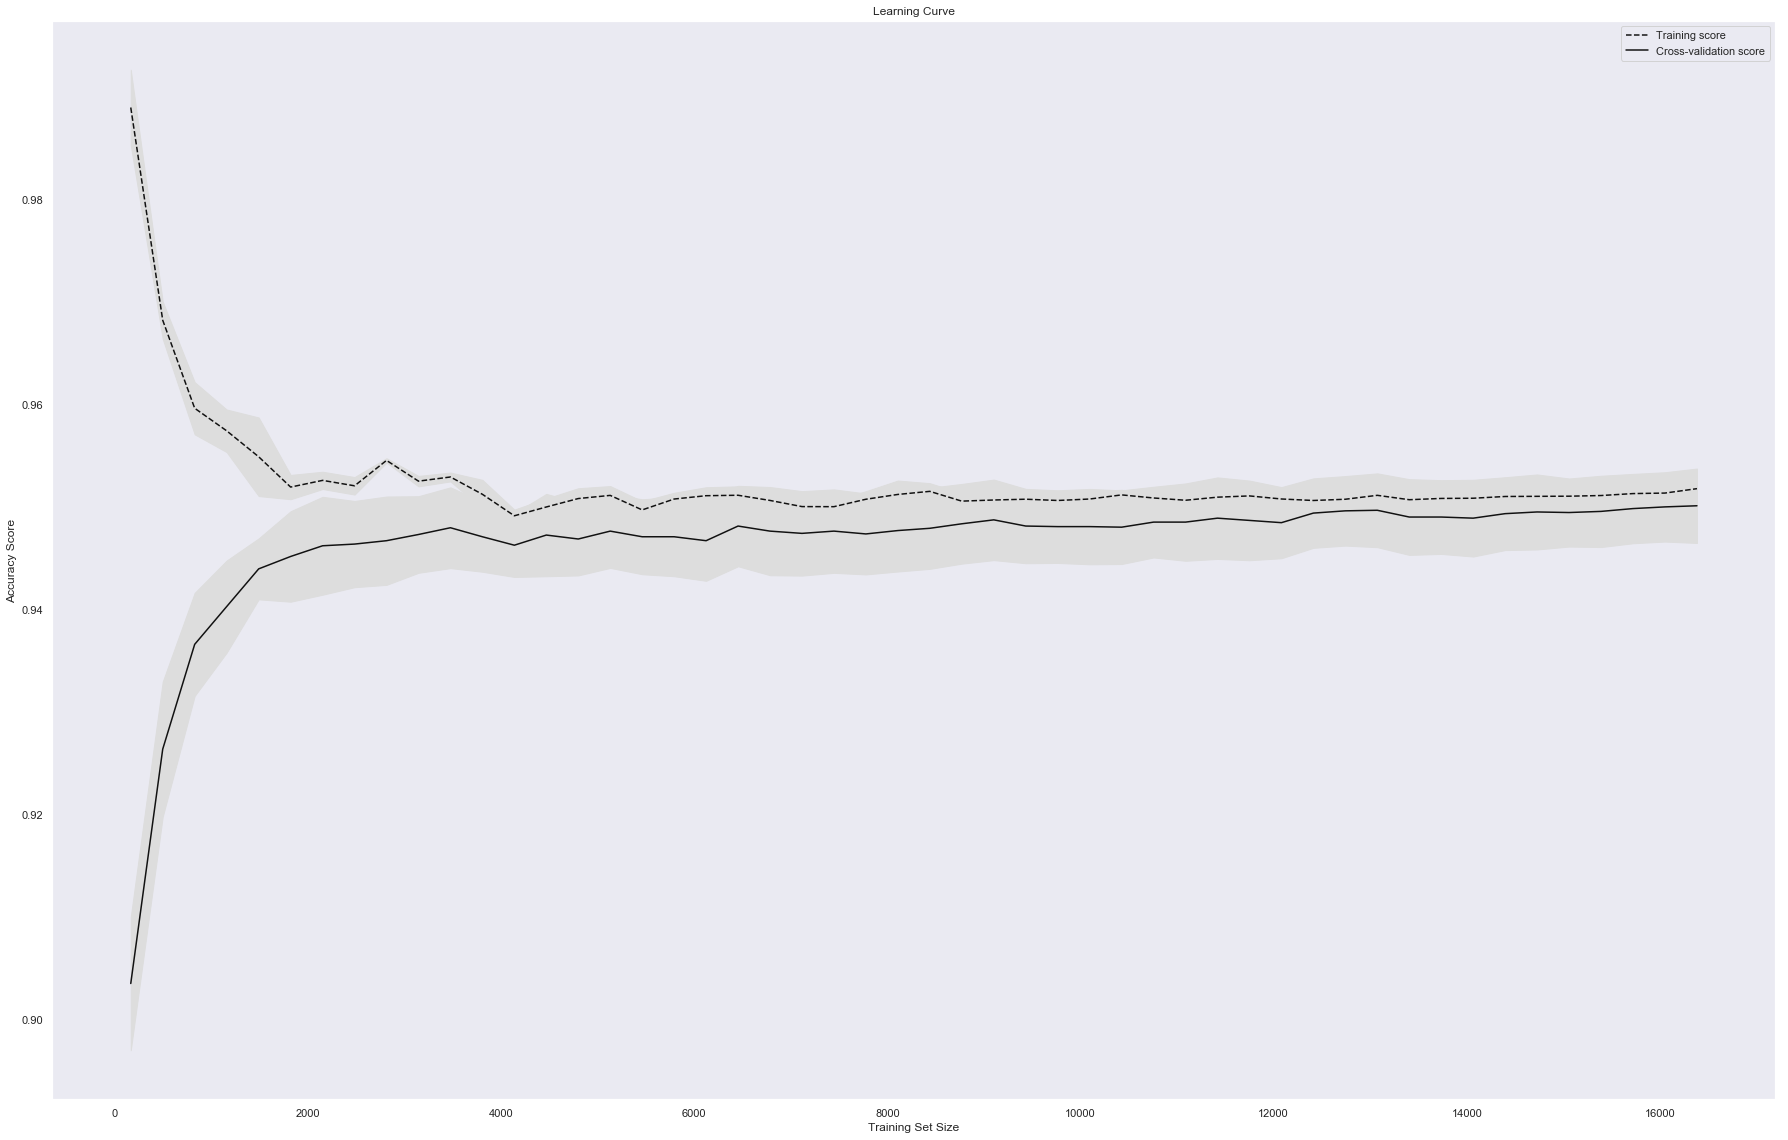

In [29]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Normalized confusion matrix
[[0.96424267 0.03575733]
 [0.0650477  0.9349523 ]]


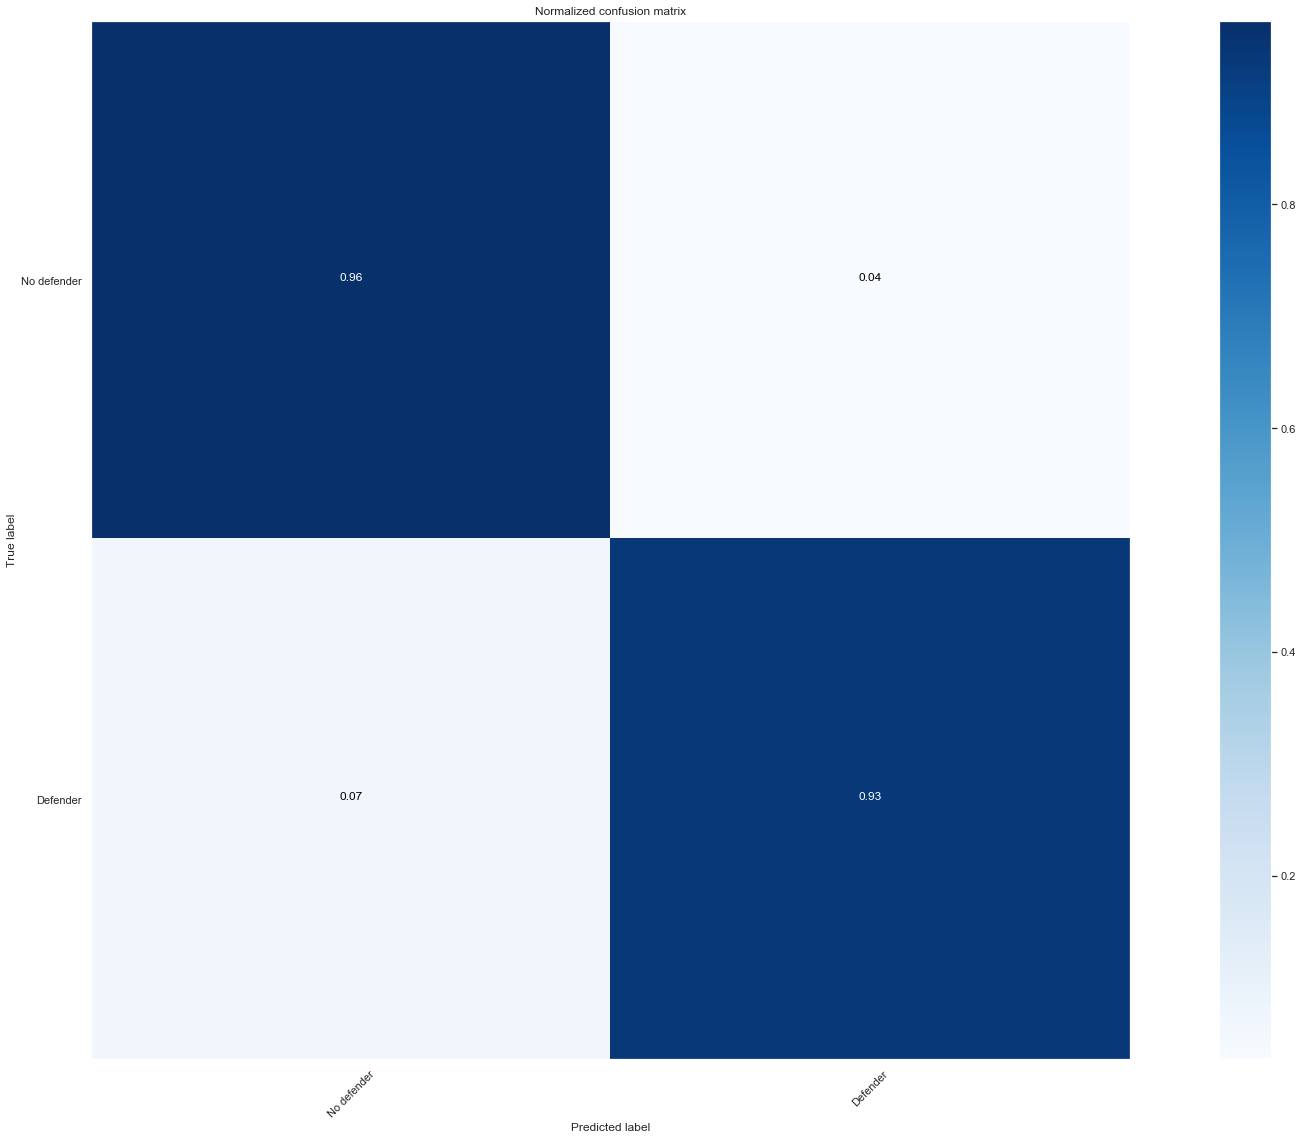

In [30]:
cm = confusion_matrix(y_test, pred_class)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized confusion matrix")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
classes = ['No defender', 'Defender']
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = '.2f' 
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

Average precision-recall score: 0.97


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.97')

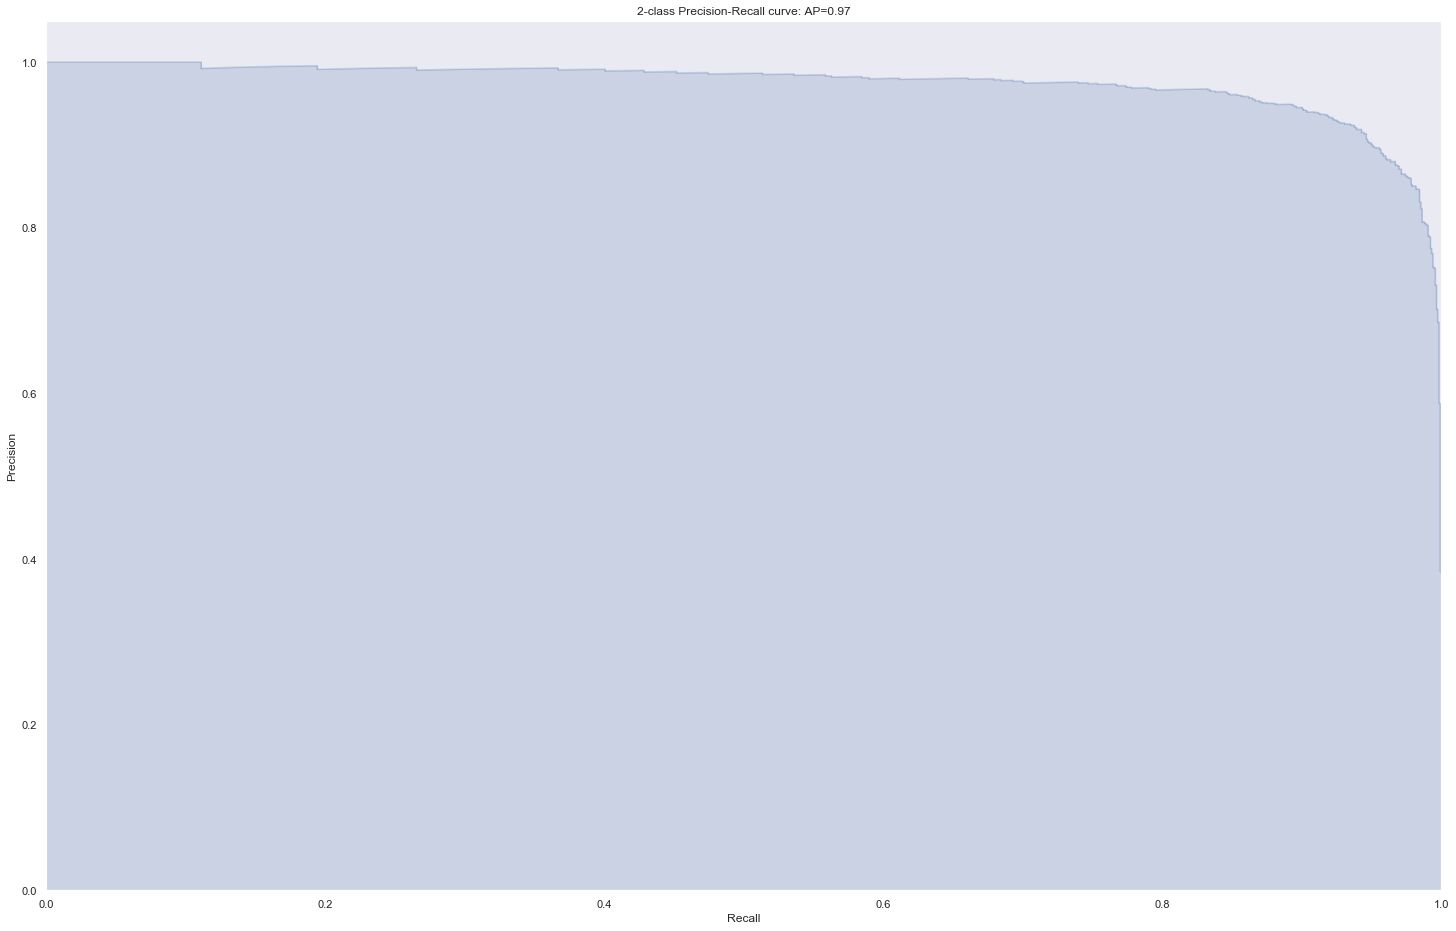

In [31]:
y_score = logreg.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [40]:
from sklearn.metrics import f1_score
print(f1_score(y_test, pred_class, average='macro'))  
print(f1_score(y_test, pred_class, average='micro'))  
print(f1_score(y_test, pred_class, average='weighted'))  
print(f1_score(y_test, pred_class, average=None))


0.950106364443645
0.957166392092257
0.957228231750493
[0.9688747  0.93133803]
